Import **Pytorch** libraries and APIs. 


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets
from torch.utils.data import Subset
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

# define the function of displaying multiple images
def show_images(images) -> None:
    n: int = images.size(0)
    
    f = plt.figure(figsize=(24, 6))
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.axis('off')
    
    plt.show(block=True)

# define the function of displaying multiple images
def show_images_withPred(images,label,pred,conf) -> None:
    n: int = images.size(0)
    
    f = plt.figure(figsize=(24, 6))
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title("{} -> {}".format(label[i], pred[i]))
        #plt.title("Conf:{} \n {} -> {}".format(conf[i][pred[i]]*100,label[i], pred[i]))
        plt.axis('off')
    
    plt.show(block=True)


# Hyperparameters and Data loaders
num_epochs = 10
num_classes = 10
batch_size = 256
learning_rate = 0.001


DATA_PATH = 'data/'
MODEL_STORE_PATH = 'models/'

# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor()])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

# Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, num_workers=4, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, num_workers=4, shuffle=False)

# CNN
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(1, -1),
        )
        self.fc1 = nn.Linear(7 * 7 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
            
    def forward(self, x):
        out = self.features(x)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)

        return out


model=LeNet()
model.cuda()
model.train()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Model training
model.train()
loss_list = []
acc_list = []
total_step = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.cuda()
    labels = labels.cuda()

    outputs = model(images)

    loss = criterion(outputs, labels)
    loss_list.append(loss.item())

    # Backprop and percform Adam optimisation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Track the accuracy
    total = labels.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    acc_list.append(correct / total)

    if (i%150 == 0):
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
              .format(epoch + 1, num_epochs, i, total_step, loss.item(),
                      (correct / total) * 100))



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Epoch [1/10], Step [0/235], Loss: 2.2986, Accuracy: 15.23%
Epoch [1/10], Step [150/235], Loss: 0.2524, Accuracy: 92.58%
Epoch [2/10], Step [0/235], Loss: 0.0533, Accuracy: 98.05%
Epoch [2/10], Step [150/235], Loss: 0.1127, Accuracy: 96.48%
Epoch [3/10], Step [0/235], Loss: 0.0294, Accuracy: 99.61%
Epoch [3/10], Step [150/235], Loss: 0.0635, Accuracy: 98.83%
Epoch [4/10], Step [0/235], Loss: 0.0675, Accuracy: 97.66%
Epoch [4/10], Step [150/235], Loss: 0.1075, Accuracy: 97.27%
Epoch [5/10], Step [0/235], Loss: 0.0660, Accuracy: 98.44%
Epoch [5/10], Step [150/235], Loss: 0.1030, Accuracy: 98.05%
Epoch [6/10], Step [0/235], Loss: 0.1007, Accuracy: 97.27%
Epoch [6/10], Step [150/235], Loss: 0.0497, Accuracy: 98.44%
Epoch [7/10], Step [0/235], Loss: 0.0443, Accuracy: 98.44%
Epoch [7/10], Step [150/235], Loss: 0.0356, Accuracy: 98.44%
Epoch [8/10], Step [0/235], Loss: 0.0103, Accuracy: 100.00%
Epoch [8/10], Step [150/235],

In [ ]:
# Model Evaluation
model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
      images = images.cuda()
      labels = labels.cuda()

      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

print(
  'Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

Accuracy of the model on the 10000 test images: 98.25 %


# **AE attack**
Generate single-step AEs to fool the trained model. Adjust the parameters to achieve a high fooling rate (low testing accuracy) while maintaining the image qualtity of the AEs.

Accuracy of the model on the 10000 test images: 10.99 %


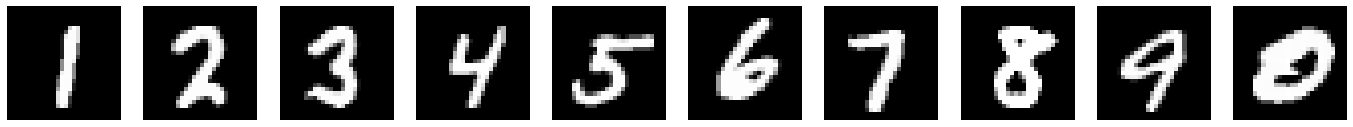

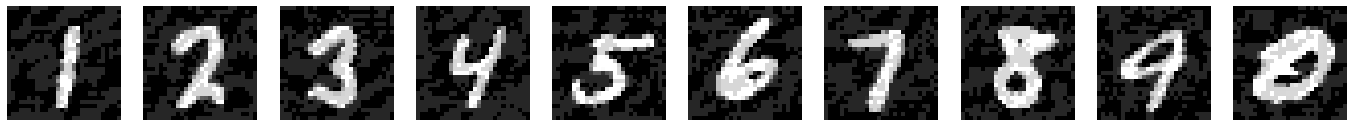

In [ ]:

def ae_attack(model, criterion, images, labels, step_size) :
    
    images.requires_grad = True
            
    outputs = model(images) #feed the original images to the model, and get the predictions
    
    model.zero_grad() #zero out the gradients
    loss = criterion(outputs, labels) # compute loss value
    loss.backward() # feedback to the model, compute the gradients.

    ae_images = images + step_size*images.grad.sign()

    ae_images = torch.clamp(ae_images, 0, 1)
    
    return ae_images

model.eval()

correct = 0
total = 0
for images, labels in test_loader:
    images = images.cuda()
    labels = labels.cuda()
    ae_images = ae_attack(model, criterion, images, labels, step_size=0.15)

    outputs = model(ae_images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(
  'Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))


show_images(images[:10].detach())
show_images(ae_images[:10].detach())